In [32]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json



In [33]:
#Charger les données json

# Chemin vers le fichier JSON
file_path = "studyCorrelation.json"

# Lecture du fichier JSON
with open(file_path, "r", encoding="utf-8") as file:
    data = json.load(file)


In [34]:
# 1. Partie 1 : studyCorrelation (liste d'étudiants)

df_study = pd.DataFrame(data["studyCorrelation"])
print("\n=== Étudiants : studyCorrelation ===")
print(df_study.head())


=== Étudiants : studyCorrelation ===
   id  hours  score
0   1   6.96     71
1   2   3.90     65
2   3   0.72     81
3   4   0.36     41
4   5   2.11     42


In [35]:
# 2. Partie 2 : courseFormat (succès/échec par format de cours)
df_course = pd.DataFrame(data["courseFormat"])
print("\n=== Format de cours : courseFormat ===")
print(df_course)


=== Format de cours : courseFormat ===
      presentiel  distanciel
pass        5915        5210
fail        4085        4790


In [36]:
# 3. Partie 3 : midtermScores (scores mi-parcours de deux classes)
df_midterm = pd.DataFrame(dict(
    class_A=data["midtermScores"]["class_A"],
    class_B=data["midtermScores"]["class_B"]
))
print("\n=== Scores mi-parcours : midtermScores ===")
print(df_midterm.head())


=== Scores mi-parcours : midtermScores ===
   class_A  class_B
0     12.0     11.9
1     10.8     13.2
2     11.7      8.6
3     12.7     10.4
4     13.8     14.6


In [37]:
# 4. Partie 4 : approachGains (gains de points selon méthode pédagogique)
df_approach = pd.DataFrame(data["approachGains"])
print("\n=== Gains par approche pédagogique : approachGains ===")
print(df_approach.head())


=== Gains par approche pédagogique : approachGains ===
   Approach1  Approach2  Approach3  Approach4
0        3.6        8.8        4.3        6.9
1        5.0        6.4        4.3        4.6
2        4.5        7.6        4.1        5.5
3        6.0        7.0        5.4        6.1
4        4.5        7.3        4.9        7.1


In [38]:
# 5. Partie 5 : completionTimes (temps pour finir un exercice selon le support)
df_times = pd.DataFrame(data["completionTimes"])
print("\n=== Temps d'exécution : completionTimes ===")
print(df_times.head())


=== Temps d'exécution : completionTimes ===
   None  Simple  Advanced
0  15.6     8.9      12.3
1  18.3    12.1       6.8
2  15.2    12.5       6.4
3  11.9    12.8       8.6
4  16.1    11.5       9.4


Réponse à la deuxième problématique :

Format de cours et certification

Question : Le format de cours (présentiel vs distanciel) influence-t-il l’obtention de la certification finale ?

Pourquoi c’est important ? L’entreprise envisage de basculer 100 % des formations en ligne. Avant de prendre cettedécision, il faut s’assurer que cela ne compromet pas la réussite des apprenants

In [39]:
# Calculer les taux de réussite



# Calcul des totaux
presentiel_total = df_course['presentiel'].sum()
distanciel_total = df_course['distanciel'].sum()

# Calcul des taux de réussite
presentiel_success_rate = df_course.loc['pass', 'presentiel'] / presentiel_total * 100
distanciel_success_rate = df_course.loc['pass', 'distanciel'] / distanciel_total * 100

# Affichage des taux
print(f"Taux de réussite en présentiel : {presentiel_success_rate:.2f}%")
print(f"Taux de réussite en distanciel : {distanciel_success_rate:.2f}%")


Taux de réussite en présentiel : 59.15%
Taux de réussite en distanciel : 52.10%


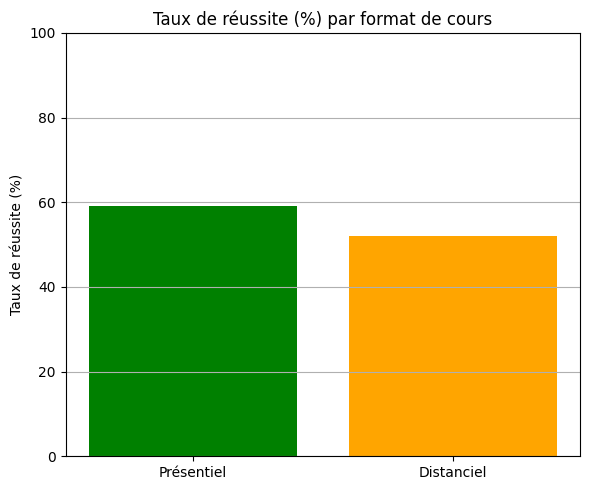

In [40]:
# Visualisation du taux de réussite

formats = ['Présentiel', 'Distanciel']
success_rates = [presentiel_success_rate, distanciel_success_rate]

plt.figure(figsize=(6,5))
plt.bar(formats, success_rates, color=['green', 'orange'])
plt.title("Taux de réussite (%) par format de cours")
plt.ylabel("Taux de réussite (%)")
plt.ylim(0, 100)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


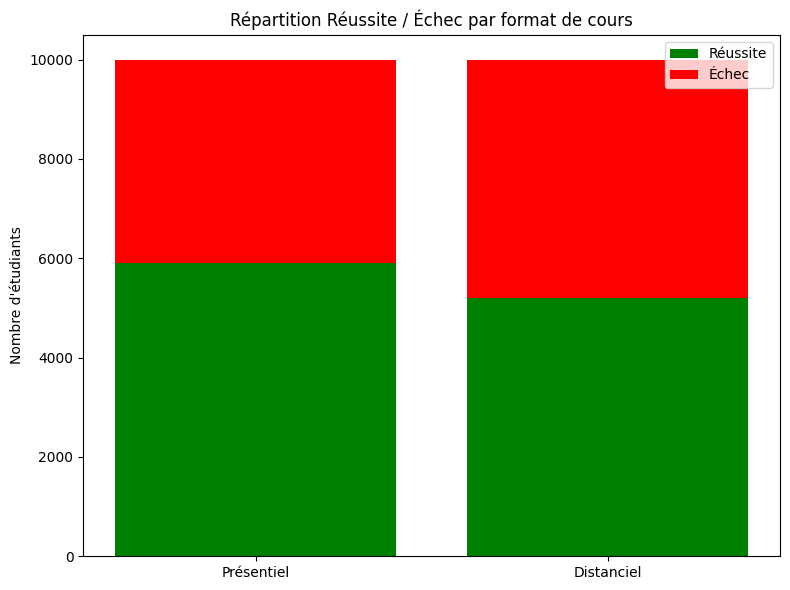

In [41]:
# Visualisation des comptes pass/fail

labels = ['Présentiel', 'Distanciel']
pass_values = df_course.loc['pass']
fail_values = df_course.loc['fail']

x = np.arange(len(labels))

plt.figure(figsize=(8,6))
plt.bar(x, pass_values, label='Réussite', color='green')
plt.bar(x, fail_values, bottom=pass_values, label='Échec', color='red')

plt.xticks(x, labels)
plt.ylabel("Nombre d'étudiants")
plt.title("Répartition Réussite / Échec par format de cours")
plt.legend()
plt.tight_layout()
plt.show()


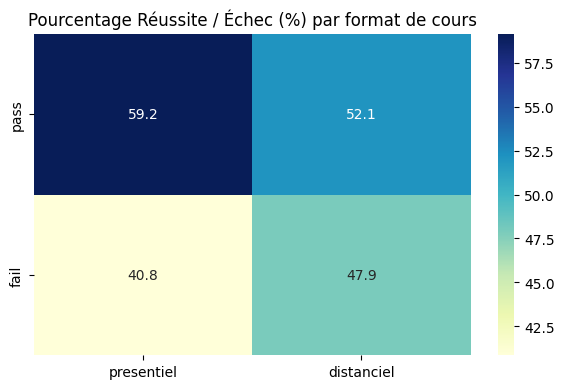

In [42]:
# Montrer la distribution en pourcentage

# Calcul des pourcentages
percent_df = df_course.copy()
percent_df['presentiel'] = (df_course['presentiel'] / df_course['presentiel'].sum()) * 100
percent_df['distanciel'] = (df_course['distanciel'] / df_course['distanciel'].sum()) * 100

# Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(percent_df, annot=True, cmap="YlGnBu", fmt=".1f", cbar=True)
plt.title("Pourcentage Réussite / Échec (%) par format de cours")
plt.tight_layout()
plt.show()

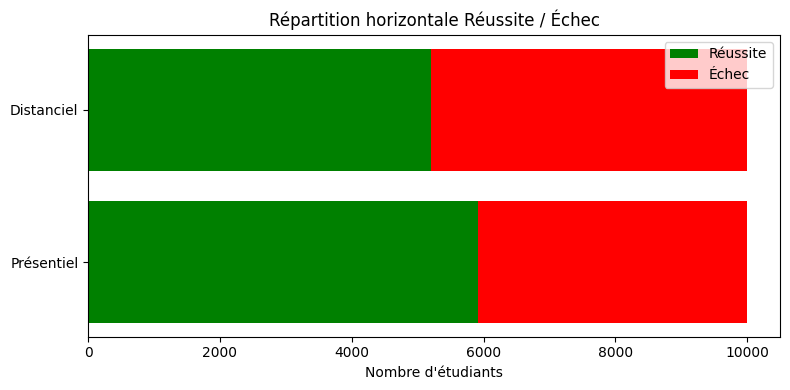

In [43]:
# Diagramme en barres horizontales cumulées

# Préparation
labels = ['Présentiel', 'Distanciel']
success = df_course.loc['pass']
fail = df_course.loc['fail']

# Graphe
plt.figure(figsize=(8,4))
plt.barh(labels, success, color='green', label='Réussite')
plt.barh(labels, fail, left=success, color='red', label='Échec')

plt.xlabel("Nombre d'étudiants")
plt.title("Répartition horizontale Réussite / Échec")
plt.legend()
plt.tight_layout()
plt.show()


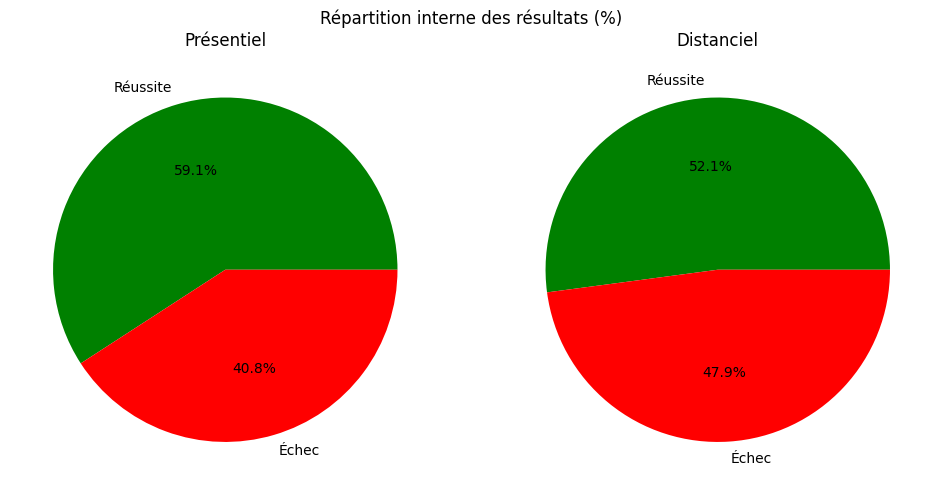

In [44]:
# Stacked pie charts

fig, axs = plt.subplots(1, 2, figsize=(10,5))

# Présentiel
axs[0].pie(df_course['presentiel'], labels=['Réussite', 'Échec'], autopct='%1.1f%%', colors=['green', 'red'])
axs[0].set_title("Présentiel")

# Distanciel
axs[1].pie(df_course['distanciel'], labels=['Réussite', 'Échec'], autopct='%1.1f%%', colors=['green', 'red'])
axs[1].set_title("Distanciel")

fig.suptitle("Répartition interne des résultats (%)")
plt.tight_layout()
plt.show()

In [46]:
#Simulation d’un passage à 100 % distanciel

# Données actuelles
total_students = df_course['presentiel'].sum() + df_course['distanciel'].sum()
current_successes = df_course.loc['pass'].sum()
current_fails = df_course.loc['fail'].sum()

# Si tout le monde passe en distanciel
dist_success_rate = df_course.loc['pass', 'distanciel'] / df_course['distanciel'].sum()
simulated_success = int(total_students * dist_success_rate)
simulated_fail = total_students - simulated_success

# Impression
print(f"✅ Aujourd'hui : {current_successes} réussites ({current_successes/total_students:.2%})")
print(f"⚠️ 100% distanciel : {simulated_success} réussites ({simulated_success/total_students:.2%})")
print(f"📉 Perte estimée : {current_successes - simulated_success} certifications")


✅ Aujourd'hui : 11125 réussites (55.62%)
⚠️ 100% distanciel : 10420 réussites (52.10%)
📉 Perte estimée : 705 certifications


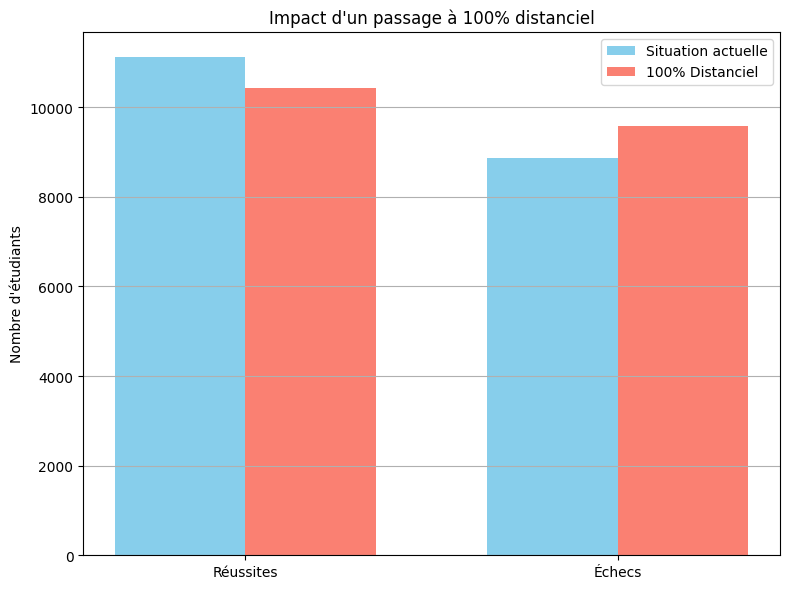

In [47]:
# Comparaison entre la situation actuelle vs 100 % distanciel (barres groupées)

import matplotlib.pyplot as plt

labels = ['Réussites', 'Échecs']
current = [current_successes, current_fails]
simulated = [simulated_success, simulated_fail]

x = range(len(labels))
width = 0.35

plt.figure(figsize=(8,6))
plt.bar(x, current, width=width, label='Situation actuelle', color='skyblue')
plt.bar([i + width for i in x], simulated, width=width, label='100% Distanciel', color='salmon')

plt.xticks([i + width/2 for i in x], labels)
plt.ylabel("Nombre d'étudiants")
plt.title("Impact d'un passage à 100% distanciel")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()




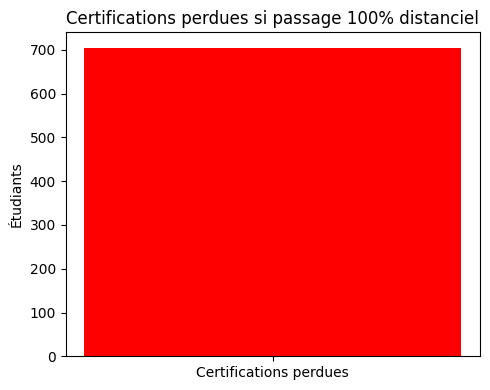

In [48]:
# Perte nette en certifications (barre unique)

perte = current_successes - simulated_success

plt.figure(figsize=(5,4))
plt.bar(['Certifications perdues'], [perte], color='red')
plt.title("Certifications perdues si passage 100% distanciel")
plt.ylabel("Étudiants")
plt.tight_layout()
plt.show()


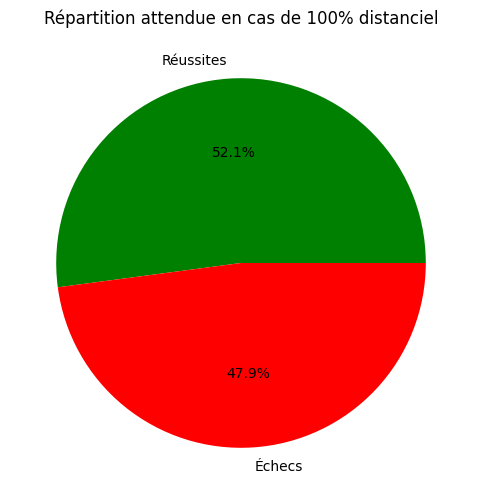

In [49]:
# Diagramme circulaire de la nouvelle répartition (100% distanciel)

plt.figure(figsize=(6,6))
plt.pie([simulated_success, simulated_fail],
        labels=["Réussites", "Échecs"],
        autopct='%1.1f%%',
        colors=["green", "red"])
plt.title("Répartition attendue en cas de 100% distanciel")
plt.show()


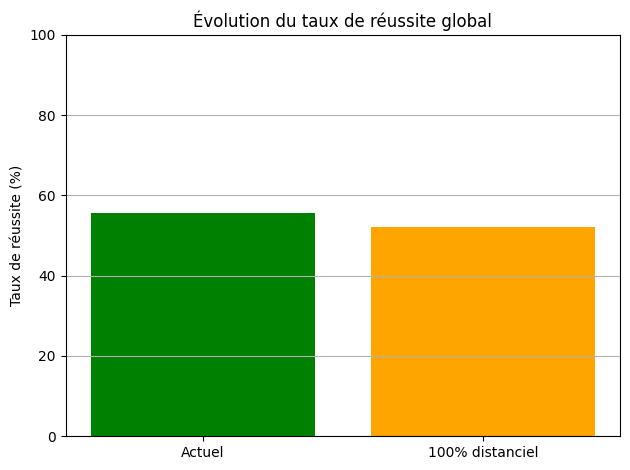

In [50]:
# Barres côte à côte : taux de réussite actuel vs futur

current_rate = current_successes / total_students * 100
simulated_rate = simulated_success / total_students * 100

plt.bar(["Actuel", "100% distanciel"], [current_rate, simulated_rate], color=["green", "orange"])
plt.ylabel("Taux de réussite (%)")
plt.title("Évolution du taux de réussite global")
plt.ylim(0, 100)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Les résultats montrent un taux de réussite de 59,15% pour le présentiel contre 52,10% pour le distanciel.
Bien que la différence semble modérée (≈7 points), elle concerne plusieurs centaines d'étudiants, ce qui est significatif à l’échelle de l’entreprise.

La visualisation en barres empilées met en évidence une plus grande part d’échec en distanciel.
Cela suggère que bascule complète vers le distanciel pourrait accroître les échecs, sauf si des dispositifs de soutien sont mis en place (mentorat, tutoriels, exercices interactifs...).

In [45]:
import nbformat

with open("mission1prob2.ipynb") as f:
    nb = nbformat.read(f, as_version=4)

if 'widgets' in nb.metadata and 'state' not in nb.metadata['widgets']:
    nb.metadata['widgets']['state'] = {}